In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import numpy as np

# we have 3 different sources of data

## 1. Donation History at an id level, an individual could have donate several times
## 2. Members List, members of the company that may or not have donated in the past
## 3. Contacted members in 2022, in an effort of increasing donations

# DonationHistory

- Some questions to resolve
    - which year had the most donations
    - are the donations focus in just a few individuals
    - is the amount of the donations different between individuals

In [108]:
# Load datasets
donationHistory = pd.read_csv("data/DonationHistory.csv")

In [109]:
len(donationHistory)

686054

In [157]:
len(donationHistory['ID'].unique())

398964

In [110]:
donationHistory.head(2)

,ID,Yr,Amount
0,5000005.0,2020,10
1,5000011.0,2017,50


<span style="color: blue;">
- A quick grasp of the donations by year
</span>    

In [122]:
donations_by_year = donationHistory.groupby('Yr')['Amount'].sum()
donations_by_year

Yr
2011     487560
2012     973490
2013    1409865
2014    1876765
2015    2375390
2016    2786385
2017    3233250
2018    3592880
2019    3991550
2020    4204465
2021    4293280
2022    7426485
Name: Amount, dtype: int64

<span style="color: blue;">
- Number of unique donors, scale up in 2022. May be related to the campaing csv file
</span>    

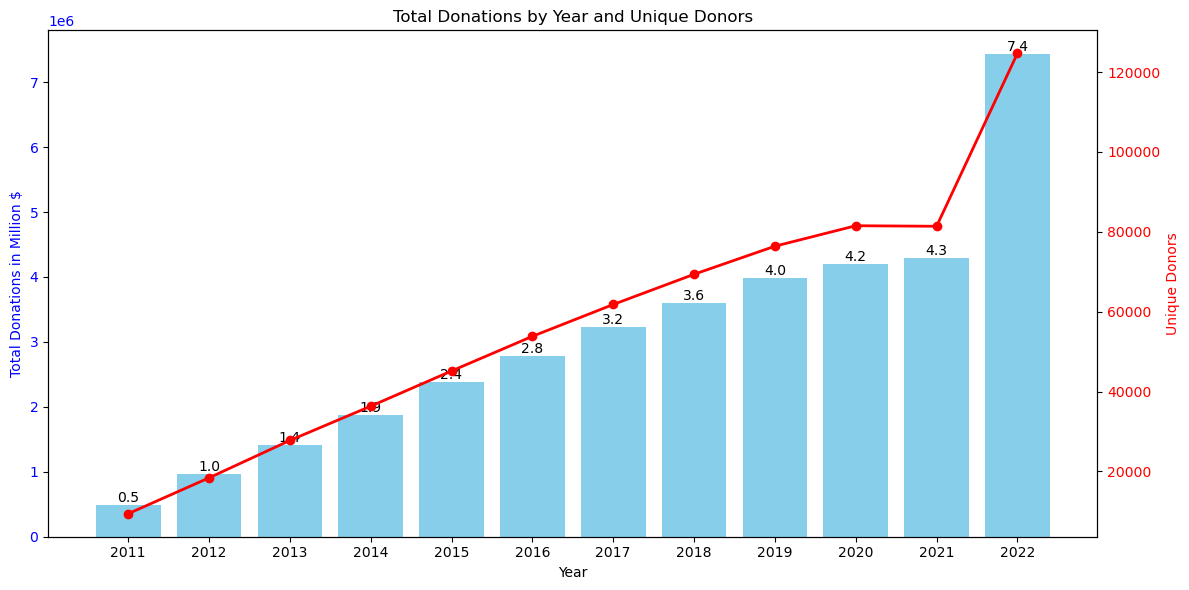

In [124]:
# Aggregate Donations by Year
donations_by_year = donationHistory.groupby('Yr')['Amount'].sum()

# Calculate the number of unique IDs (donors) by Year
unique_ids_by_year = donationHistory.groupby('Yr')['ID'].nunique()

# Define colors: You can highlight specific years, for example, red for June (6) and December (12).
# In this case, we're just setting it as skyblue since we're working by year
colors = ['skyblue' for _ in donations_by_year.index]

# Create the figure and the first axis for the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Donations by Year (Bar plot)
ax1.bar(donations_by_year.index.astype(str), donations_by_year, color=colors, label="Total Donations")

# Add labels on top of the bars
for i, v in enumerate(donations_by_year):
    ax1.text(i, v + 5, str(round(v / 1000000, 1)), ha='center', va='bottom', fontsize=10)  # Adding labels above the bars

# Set labels and title for the first axis (Total Donations)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Donations in Million $', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Total Donations by Year and Unique Donors')

# Create a second y-axis to plot the line for unique IDs (Donors)
ax2 = ax1.twinx()

# Plot the Unique Donors by Year (Line plot)
ax2.plot(unique_ids_by_year.index.astype(str), unique_ids_by_year, color='red', marker='o', label="Unique Donors", linewidth=2)

# Set labels for the second axis (Unique Donors)
ax2.set_ylabel('Unique Donors', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to make sure everything fits
fig.tight_layout()

# Show the plot
plt.show()

<span style="color: blue;">
- Donor with the highest amount donated is 5268017 with an amount of $11.020, the donated most in 2016, $10.000 
- We can see that there are some donors that donated a lot a long time ago..
- And also donors at the bottom with only a few amount ($10) 
</span>  

In [188]:
donations_idlevel = ps.sqldf(''' 
select A."ID",
sum(A.Amount) Amount,
sum(case when Yr='2022' then A.Amount else 0 end) Amount_2022,
sum(case when Yr='2021' then A.Amount else 0 end) Amount_2021,
sum(case when Yr='2020' then A.Amount else 0 end) Amount_2020,
sum(case when Yr='2019' then A.Amount else 0 end) Amount_2019,
sum(case when Yr='2018' then A.Amount else 0 end) Amount_2018,
sum(case when Yr='2017' then A.Amount else 0 end) Amount_2017,
sum(case when Yr='2016' then A.Amount else 0 end) Amount_2016,
sum(case when Yr='2015' then A.Amount else 0 end) Amount_2015,
sum(case when Yr='2014' then A.Amount else 0 end) Amount_2014,
sum(case when Yr='2013' then A.Amount else 0 end) Amount_2013,
sum(case when Yr='2012' then A.Amount else 0 end) Amount_2012,
sum(case when Yr='2011' then A.Amount else 0 end) Amount_2011
from donationHistory A
group by A."ID" 
order by sum(Amount) desc
''')

donations_idlevel

,ID,Amount,Amount_2022,Amount_2021,Amount_2020,Amount_2019,Amount_2018,Amount_2017,Amount_2016,Amount_2015,Amount_2014,Amount_2013,Amount_2012,Amount_2011
0,5268017.0,11020,20,1000,0,0,0,0,10000,0,0,0,0,0
1,5248008.0,10450,450,0,0,10000,0,0,0,0,0,0,0,0
2,5450455.0,10440,0,25,0,0,0,300,10000,0,40,75,0,0
3,5446402.0,10260,10000,30,0,0,0,30,200,0,0,0,0,0
4,5949229.0,10220,0,0,0,200,10000,0,0,0,0,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398959,5000050.0,10,0,0,10,0,0,0,0,0,0,0,0,0
398960,5000048.0,10,0,0,0,0,0,10,0,0,0,0,0,0
398961,5000021.0,10,10,0,0,0,0,0,0,0,0,0,0,0
398962,5000015.0,10,0,0,0,0,0,0,0,0,0,0,10,0


<span style="color: blue;">
- The average donation is close to \$50, the 95 percentile is \$150 for most years. <br>
- Donations higher than \$ 150 are least likely.<br>
- In 2022, out of 124.684 donors, 8.034 donated more than \$150 with an average amount of \$391<br>
- We have a lot of donors, but the bulk of the donations <br>
- In 2022, 8,034 donors represented 42.3% of the amount donated <br>
</span>  <br>

In [152]:
# Aggregating stats by Year
stats_by_year = donationHistory.groupby('Yr').agg(
    amount=('Amount', 'sum'),
    avg_amount=('Amount', 'mean'),
    max_amount=('Amount', 'max'),
    min_amount=('Amount', 'min'),
    percentile_5=('Amount', lambda x: x.quantile(0.05)),
    percentile_95=('Amount', lambda x: x.quantile(0.95)),
    unique_donors=('ID', 'nunique')
).reset_index()

stats_by_year_high_end = donationHistory[donationHistory['Amount']>150].groupby('Yr').agg(
    unique_donors_high_end=('ID', 'nunique'),
    amount_high_end=('Amount', 'sum'),
    avg_amount_high_end=('Amount', 'mean')
).reset_index()

# Display the results
stats_by_year = stats_by_year.merge(stats_by_year_high_end,on="Yr",how="left")
stats_by_year['amount_percentage_in_high_end'] = stats_by_year['amount_high_end']/stats_by_year['amount']
stats_by_year

,Yr,amount,avg_amount,max_amount,min_amount,percentile_5,percentile_95,unique_donors,unique_donors_high_end,amount_high_end,avg_amount_high_end,amount_percentage_in_high_end
0,2011,487560,51.779949,4000,10,10.0,150.0,9416,445,184325,414.213483,0.378056
1,2012,973490,52.912817,10000,10,10.0,150.0,18398,818,370425,452.842298,0.380512
2,2013,1409865,50.787644,10000,10,10.0,150.0,27760,1206,506725,420.169983,0.359414
3,2014,1876765,51.648870,7000,10,10.0,150.0,36337,1623,691225,425.893407,0.368307
4,2015,2375390,52.601754,10000,10,10.0,150.0,45158,2019,908050,449.752353,0.382274
5,2016,2786385,51.763640,10000,10,10.0,150.0,53829,2343,1040000,443.875373,0.373243
6,2017,3233250,52.316268,10000,10,10.0,150.0,61802,2698,1225650,454.280949,0.379077
7,2018,3592880,51.794487,10000,10,10.0,150.0,69368,3075,1331500,433.008130,0.370594
8,2019,3991550,52.248838,10000,10,10.0,150.0,76395,3458,1502875,434.608155,0.376514
9,2020,4204465,51.575238,10000,10,10.0,150.0,81521,3576,1543500,431.627517,0.367110


# MemberList


- Some questions to resolve
    - how many members do we have
    - which info do we have of the members

In [154]:
MemberList = pd.read_csv("data/MembersList.csv")
len(MemberList)

1000000

In [155]:
MemberList.head(2)

,ID,LastName,FirstName,email,Woman,Age,Salary,Education,City,Joined
0,5000001.0,ALBERSON,TISH,tish@overview.com,1,49,169200.0,University / College,Downtown,2016
1,5000002.0,DAVIES,ANDREA,andrea@myschool.edu,1,69,2900.0,Elementary,Suburban,2011


<span style="color: blue;">
- The # of members from which we have data are 1.000.000
</span>  <br>

In [158]:
len(MemberList['ID'].unique())

1000000

<span style="color: blue;">
- The # of nulls is only 33 in the LastName column, wont be an issue
</span>  <br>

In [159]:
MemberList.isnull().sum()

ID            0
LastName     33
FirstName     0
email         0
Woman         0
Age           0
Salary        0
Education     0
City          0
Joined        0
dtype: int64

<span style="color: blue;">
- Most members, are women <br>
- Most have University level <br>
- mean age 46
- mean salary around 67k
</span>  <br>

In [168]:
numerical_cols = ['Age', 'Salary', 'Joined']  # assuming 'Age', 'Salary', and 'Joined' are numerical
categorical_cols = ['Woman', 'Education', 'City']  # 'Woman' is treated as categorical

numerical_summary = MemberList[numerical_cols].agg(
    {
        'Age': ['min','mean', 'max',lambda x: x.quantile(0.05), lambda x: x.quantile(0.95), 'median'],
        'Salary': ['min','mean', 'max',lambda x: x.quantile(0.05), lambda x: x.quantile(0.95), 'median'],
        'Joined': ['min','mean', 'max',lambda x: x.quantile(0.05), lambda x: x.quantile(0.95), 'median'],
    }
).transpose()

# Rename the columns to more readable names
numerical_summary.columns = ['Min','Mean','Max', '5th Percentile', '95th Percentile', 'Median']

# Summary for categorical columns
print("Categorical Summary:")
for col in categorical_cols:
    print(f"\nValue counts for column '{col}':")
    print(MemberList[col].value_counts())
    
# Display the results
print("\nNumerical Summary:")
print(numerical_summary)

Categorical Summary:

Value counts for column 'Woman':
1    517266
0    482734
Name: Woman, dtype: int64

Value counts for column 'Education':
University / College    647223
High School             322964
Elementary               29813
Name: Education, dtype: int64

Value counts for column 'City':
City        333032
Suburban    312123
Rural       198628
Downtown    156217
Name: City, dtype: int64

Numerical Summary:
           Min          Mean       Max  5th Percentile  95th Percentile  \
Age       16.0     46.373012      90.0            18.0             80.0   
Salary     0.0  65431.669900  250000.0          4300.0         204200.0   
Joined  2011.0   2016.416967    2021.0          2011.0           2021.0   

         Median  
Age        46.0  
Salary  44000.0  
Joined   2017.0  


# ListContacted2022


- Some questions to resolve
    - how many we contacted
    - how many of the contacted donated in 2022 or not
    - how many of the member list we do not contacted 
        -of those how many donated

In [175]:
# Load datasets
ListContacted = pd.read_csv("data/ListContacted.csv",header=None)
ListContacted.rename(columns={0: 'ID'}, inplace=True)

In [176]:
ListContacted.head(5)

,ID
0,5448830
1,5104178
2,5037676
3,5513132
4,5038006


<span style="color: blue;">
- We contacted 100.000 members
</span>   

In [177]:
len(ListContacted['ID'].unique())

100000

In [180]:
ListContacted['Contacted']='Yes'

# We merge the three datasets, to see for each member their characteristics, their donation history, and whether they were contacted in 2022 

## new dataset call df

In [197]:
len(donations_idlevel)

398964

In [189]:
df = MemberList.merge(donations_idlevel,on='ID',how="left")
df.head(3)

,ID,LastName,FirstName,email,Woman,Age,Salary,Education,City,Joined,...,Amount_2020,Amount_2019,Amount_2018,Amount_2017,Amount_2016,Amount_2015,Amount_2014,Amount_2013,Amount_2012,Amount_2011
0,5000001.0,ALBERSON,TISH,tish@overview.com,1,49,169200.0,University / College,Downtown,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5000002.0,DAVIES,ANDREA,andrea@myschool.edu,1,69,2900.0,Elementary,Suburban,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5000003.0,CALDWELL,JANIS,janis@mymail.ca,1,35,12600.0,High School,City,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
df = df.merge(ListContacted2022,on='ID',how="left")
df['Contacted'].fillna('No', inplace=True)
df[['ID','Amount','Contacted','Amount_2022', 'Amount_2021', 'Amount_2020',
       'Amount_2019', 'Amount_2018', 'Amount_2017', 'Amount_2016',
       'Amount_2015', 'Amount_2014', 'Amount_2013', 'Amount_2012',
       'Amount_2011']].head(3)

,ID,Amount,Contacted_2022,Amount_2022,Amount_2021,Amount_2020,Amount_2019,Amount_2018,Amount_2017,Amount_2016,Amount_2015,Amount_2014,Amount_2013,Amount_2012,Amount_2011
0,5000001.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5000002.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5000003.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color: blue;">
- The amount donated was higher in the no contacted 2022, but the average was higher in those contacted 
- the max amount donated in those contacted was 4.000
- 
</span>   

In [192]:
donations_summary = df.groupby('Contacted').agg(
    unique_ids=('ID', 'nunique'),          # Number of unique IDs
    amount=('Amount_2022', 'sum'),     # Minimum amount
    min_amount=('Amount_2022', 'min'),     # Minimum amount
    max_amount=('Amount_2022', 'max'),     # Maximum amount
    mean_amount=('Amount_2022', 'mean'),   # Mean of the amount
    median_amount=('Amount_2022', 'median')  # Median of the amount
).reset_index()

# Display the result
print(donations_summary)

  Contacted_2022  unique_ids     amount  min_amount  max_amount  mean_amount  \
0             No      900000  5735855.0         0.0     10000.0    15.995446   
1            Yes      100000  1690630.0         0.0      4000.0    41.877338   

   median_amount  
0            0.0  
1            0.0  


<span style="color: blue;">
- Of those contacted, only 14.719 donated in 2022, the conversion rate was near 15%
- 
</span>   

In [195]:
df['Donated_2022'] = np.where(df['Amount_2022']>0,'Yes','No')

In [196]:
donations_summary = df.groupby(['Contacted','Donated_2022']).agg(
    unique_ids=('ID', 'nunique'),          # Number of unique IDs
    amount=('Amount_2022', 'sum'),     # Minimum amount
    min_amount=('Amount_2022', 'min'),     # Minimum amount
    max_amount=('Amount_2022', 'max'),     # Maximum amount
    mean_amount=('Amount_2022', 'mean'),   # Mean of the amount
    median_amount=('Amount_2022', 'median')  # Median of the amount
).reset_index()

# Display the result
print(donations_summary)

  Contacted_2022 Donated_2022  unique_ids     amount  min_amount  max_amount  \
0             No           No      790035        0.0         0.0         0.0   
1             No          Yes      109965  5735855.0        10.0     10000.0   
2            Yes           No       85281        0.0         0.0         0.0   
3            Yes          Yes       14719  1690630.0        10.0      4000.0   

   mean_amount  median_amount  
0     0.000000            0.0  
1    52.160733           25.0  
2     0.000000            0.0  
3   114.860385           75.0  


# After all this previous exploration some new questions arise.
# 1. How to identify 100.000 members to call in 2023, to get a higher conversion rate, and a high amount donated? 
# 2. What are the factors that identify those that donate without getting a call, 
# 3. What are the factor that identify those that donate by receiving a call?